In [55]:
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
order_data_path = '.\eleme_round1_testB\order'
filename = 'order_20200301.txt'
order_data = pd.read_csv(os.path.join(order_data_path,filename))
order_data

,courier_id,wave_index,tracking_id,weather_grade,pick_lng,pick_lat,deliver_lng,deliver_lat,create_time,confirm_time,assigned_time,promise_deliver_time,estimate_pick_time,aoi_id,shop_id
0,100002543,3,2100076043279042258,正常天气,121.634326,39.139450,121.627454,39.133901,1583036107,1583036108,1583036150,1583038927,1583037308,13f8f2302b45997388ede0af8ae9666c,8ba9b3c86b2c240b3436e5431ad68cdf
1,100002543,3,2100076045156320581,正常天气,121.630624,39.134761,121.627434,39.151311,1583036574,1583036575,1583036629,1583039154,1583037835,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
2,100002543,3,2100076044413207877,正常天气,121.630624,39.134761,121.628234,39.151201,1583036761,1583036762,1583036809,1583039641,1583038022,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
3,100002543,3,2100076044139038021,正常天气,121.630624,39.134761,121.626044,39.151461,1583037264,1583037266,1583037289,1583040204,1583038706,bf49288eb197bc6b44fa0573acf8c74d,d97fb99890e2ace6955f21909cdd62dc
4,100002543,3,2100076045016368756,正常天气,121.628645,39.134531,121.629434,39.163821,1583037530,1583037530,1583037829,1583040530,1583038430,4b63bb7d8b5d8c847adbced3a03eb117,d5f36d54c0b0e914d6676fd87bfd5a0c
5,100006950,3,2100076084260308951,正常天气,121.405083,39.038953,121.404974,39.043881,1583059661,1583059662,1583059719,1583061641,1583060442,594ca29a20304cd527afc692855baa8d,c9ffd2d8caf2a4eb70b304097d59c4ea
6,100006950,3,2100076084649002967,正常天气,121.405083,39.038953,121.400604,39.047261,1583059965,1583059967,1583060020,1583062005,1583060747,077f0ac3ad8ba641e5ac0defcd59f75e,c9ffd2d8caf2a4eb70b304097d59c4ea
7,100006950,3,2100076085507393263,正常天气,121.412077,39.042021,121.395734,39.044271,1583059998,1583059999,1583060079,1583063178,1583061259,6f0f2c8a4249e332ed571627d889c3d8,a5f58cbe918e7ed240a9dbd77f9305e6
8,100006950,3,2100076086414968050,正常天气,121.411774,39.042251,121.401354,39.044701,1583060198,1583060204,1583060259,1583062418,1583061284,4021e054ae7bf60be3618d495c130039,0079217185fc5b5fc1ff7709109fa040
9,100006950,3,2100076086461237066,正常天气,121.411257,39.042865,121.396294,39.047231,1583060461,1583060463,1583060499,1583063341,1583061483,3673caaa2db4ffaee80ba001703c8912,a5a834b5cafd03031f5bb4f52fbdca05


### Plot

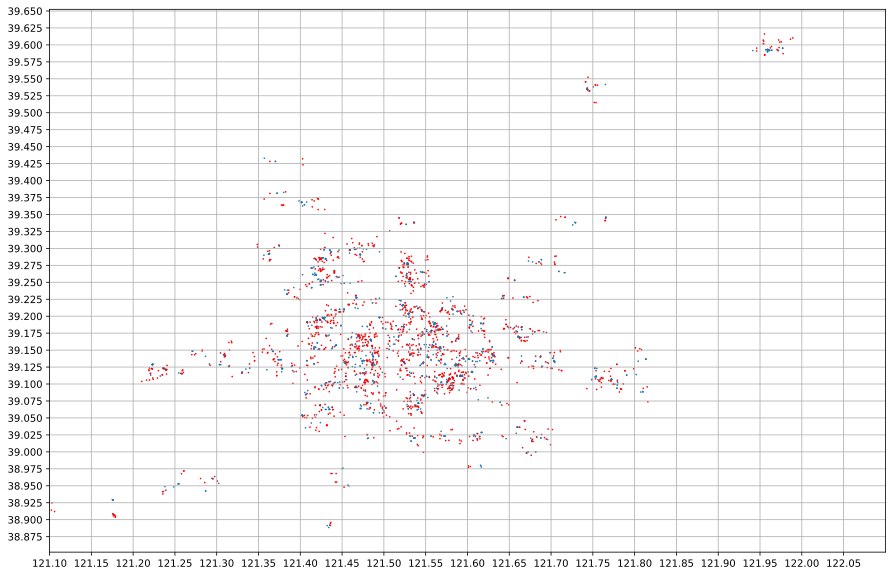

In [57]:
# order_data[order_data['wave_index'] == 1].iloc[1]['courier_id']
data = order_data[order_data['wave_index'] == 1]
''' scatter '''
plt.figure(figsize=(15,10))
plt.xticks(np.arange(121.1, 122.1 ,0.05))
plt.xlim(121.1, 122.1)
plt.yticks(np.arange(38.8,39.7,0.025))
plt.scatter(data['pick_lng'],data['pick_lat'],s=0.5)
plt.scatter(data['deliver_lng'],data['deliver_lat'],s=0.5, c='r')
plt.grid()
# ''' hist '''
# n = 10
# a = 1.5830275e+09
# b = 1.5830425e+09
# d = (a-b)/n
# plt.xlim(a,b)
# plt.hist(data['estimate_pick_time'],bins = 100)

### Zoning and Sample a small batch of orders as a case

In [85]:
def time_narrowing_data(data, start, range):
    data.loc[:,'estimate_pick_time'] -= start
    data.loc[:,'promise_deliver_time'] -= start
    narrowed_data = data[(data['estimate_pick_time'] > 0) & (data['estimate_pick_time'] < range)].copy(deep = True)
    return narrowed_data

def zoning_from_data(data, lng1, lng2, lat1, lat2):
    data = data.drop(columns= ['tracking_id', 'weather_grade', 'create_time', 'confirm_time', 'assigned_time', 'aoi_id'])
    zoned_data = data[(lng1 <= data['pick_lng']) &
                      (lng2 >= data['pick_lng']) &
                      (lat1 <= data['pick_lat']) &
                      (lat2 >= data['pick_lat'])].copy(deep = True)
    return zoned_data

def sample_from_data(data, case_num, courier_num):
    cases = []; iloc1 = 0; iloc2 = 0
    for i in range(case_num):
        ccount = 1
        curname = data.iloc[iloc1]['courier_id']
        while ccount <= courier_num: #find the the right indexes to select
            iloc2 += 1
            if  data.iloc[iloc2]['courier_id'] != curname:
                curname = data.iloc[iloc2]['courier_id']
                ccount += 1
        cases.append(data.iloc[iloc1:iloc2].copy(deep = True))
        iloc1 = iloc2
    return cases

In [87]:
data_section = order_data[order_data['wave_index'] == 1]
courier_num = 7
case_num = 2
# divide a group of cases in a specific area by specify longitude and latitude.
llgt1 = (121.5, 121.6, 39.2, 39.3)
timespan = (1.583e9+32000,7200)
span_data = time_narrowing_data(data_section,*timespan)
cases = sample_from_data(zoning_from_data(span_data,*llgt1), case_num, courier_num)
data = cases[0]
# plt.scatter(data['pick_lng'],data['pick_lat'],s=1)
# plt.scatter(data['deliver_lng'],data['deliver_lat'],s=1, c='r')
data['promise_deliver_time'] - data['estimate_pick_time']

C:\Users\yapiy\AppData\Local\Temp\ipykernel_16560\582448309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'estimate_pick_time'] -= start
C:\Users\yapiy\AppData\Local\Temp\ipykernel_16560\582448309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'promise_deliver_time'] -= start


264     1259.0
265     1019.0
266     1376.0
267     1738.0
268     2039.0
415     2879.0
416     1138.0
417     1199.0
418      897.0
419     1559.0
420     1320.0
494     1249.0
495     2039.0
496     1308.0
497     1379.0
498     1256.0
881     1077.0
882     1198.0
883      960.0
1117    1540.0
1118    1197.0
1119    1009.0
1354    4821.0
1372    1797.0
1373     718.0
1374     719.0
1375    1500.0
dtype: float64

# Build 'nodes', 'distance_Matrix' from sampled data

In [88]:
   def generate_nodes_data(data):
    nodes_data = data[['pick_lng','pick_lat','deliver_lng','deliver_lat','promise_deliver_time','estimate_pick_time','shop_id']].copy()
    nodes_data.loc[:,'order_id'] = range(0,len(data))

    # ----- rstr_data ------
    rstr_data = nodes_data[['pick_lng','pick_lat','order_id','estimate_pick_time','shop_id']].rename(columns={'pick_lng':'longitude','pick_lat':'latitude','estimate_pick_time':'time'})
    rstr_data['type'] = 101
    # pick n drone-base
    order_per_shop = data.groupby(['shop_id']).count()
    drone_base_list = order_per_shop.sort_values(by=['wave_index'],ascending = False)[0:3].index.tolist()
    rstr_data.loc[rstr_data['shop_id'].isin(drone_base_list),'type'] = 103
    rstr_data.drop(columns=['shop_id'], inplace=True)

    # ----- cstm_data ------
    cstm_data = nodes_data[['deliver_lng','deliver_lat','order_id','promise_deliver_time']].rename(columns={'deliver_lng':'longitude','deliver_lat':'latitude','promise_deliver_time':'time'})
    cstm_data['type'] = 201

    # ----- concat_data -----
    nodes_data = pd.concat([rstr_data,cstm_data])
    nodes_data.reset_index(drop=True, inplace=True)
    return nodes_data

nodes_data = generate_nodes_data(cases[0])
nodes_data.loc[:,'time'] = nodes_data.loc[:,'time'] - nodes_data.loc[:,'time'].min()
nodes_data

,longitude,latitude,order_id,time,type
0,121.587833,39.207096,0,4091.0,103
1,121.587833,39.207096,1,4313.0,103
2,121.594627,39.208698,2,4959.0,101
3,121.587833,39.207096,3,4980.0,103
4,121.595498,39.208097,4,5390.0,101
5,121.522929,39.216493,5,445.0,101
6,121.523035,39.216065,6,643.0,101
7,121.521968,39.215687,7,716.0,101
8,121.525689,39.212708,8,1592.0,101
9,121.526124,39.215502,9,2388.0,101


# Build distance matrix

In [97]:
import math
def ground_distance(lng1, lat1, lng2, lat2):
    COEFFICIENT = 1.4
    RADIUS = 6367000.0
    # 经度差值
    deltaLng = lng2 - lng1
    # 纬度差值
    deltaLat = lat2 - lat1
    # 平均纬度
    b = (lat1 + lat2) / 2.0
    # 东西距离
    x = math.radians(deltaLng) * RADIUS * math.cos(math.radians(b))
    # 南北距离
    y = RADIUS * math.radians(deltaLat)
    # 用平面的矩形对角距离公式计算总距离
    return math.sqrt(x * x + y * y)*COEFFICIENT

def drone_distance(lng1, lat1, lng2, lat2):
    RADIUS = 6367000.0
    deltaLng = lng2 - lng1
    deltaLat = lat2 - lat1
    b = (lat1 + lat2) / 2.0
    x = math.radians(deltaLng) * RADIUS * math.cos(math.radians(b))
    y = RADIUS * math.radians(deltaLat)
    return math.sqrt(x * x + y * y)

def cal_vehicle_matrix(nodes, vehicle_speed, vehicle_type='truck'):
    #Notice: Here Should plugin exNODES instead of NODES
    M = 1000
    n = nodes.shape[0] #the number of nodes
    lenthMatrix = np.zeros([n,n])
    if vehicle_type == 'drone':
        get_distance_matrix = drone_distance
        operate_time = 90
    else:
        get_distance_matrix = ground_distance
        operate_time = 90
    for i in range(n):
        for j in range(n):
            lenthMatrix[i,j] = get_distance_matrix(nodes['longitude'][i], nodes['longitude'][i], nodes['longitude'][j], nodes['longitude'][j])/vehicle_speed + operate_time
            # lenthMatrix[i,j] = get_distance_matrix(nodes['longitude'][i], nodes['longitude'][i], nodes['longitude'][j], nodes['longitude'][j])
        if vehicle_type == 'drone':
            lenthMatrix[i,i] = 0
        else:
            lenthMatrix[i,i] = M
    return lenthMatrix

In [98]:
ground_distance_matrix = cal_vehicle_matrix(nodes_data,5)
drone_distance_matrix = cal_vehicle_matrix(nodes_data,5,'drone')
ground_distance_matrix

array([[1000.        ,   90.        ,  328.64528984, ...,  726.74875116,
         772.40621923,  185.50451613],
       [  90.        , 1000.        ,  328.64528984, ...,  726.74875116,
         772.40621923,  185.50451613],
       [ 328.64528984,  328.64528984, 1000.        , ...,  965.39404006,
        1011.051508  ,  424.14980592],
       ...,
       [ 726.74875116,  726.74875116,  965.39404006, ..., 1000.        ,
         135.65746821,  631.24423527],
       [ 772.40621923,  772.40621923, 1011.051508  , ...,  135.65746821,
        1000.        ,  676.90170338],
       [ 185.50451613,  185.50451613,  424.14980592, ...,  631.24423527,
         676.90170338, 1000.        ]])

### output

In [103]:
order = ['longitude','latitude','type','order_id','time']
nodes_data = nodes_data[order]

In [104]:
nodes_data.to_csv('exNodes.csv',index=False,header=False)
pd.DataFrame(drone_distance_matrix).to_csv('Td.csv',index=False,header=False)
pd.DataFrame(ground_distance_matrix).to_csv('Tt.csv',index=False,header=False)

Read Order data into dataframe

In [ ]:
for f in os.listdir(os.path.join(train_path, 'order')):
    date = f.split('.')[0].split('_')[1]
    df = pd.read_csv(os.path.join(train_path, 'order', f))
    df['date'] = date
    order_list.append(df)

In [9]:
os.listdir(".")

['.idea',
 'elemeDataExplore.ipynb',
 'eleme_round1_testB',
 'tianchi_elm_delivery']